\author{Brice Robert} 

***Student:*** Brice Robert, ***Track:*** ICS

***Document:*** REPORT.pdf, ***Type:*** Laboratory

***Languages used:*** LaTeX, Julia (in lieu of MATLAB)

***Tools used:*** Jupyter, nbconvert (converting to PDF)

***Permanent Link:*** https://github.com/setrar/MobCom/blob/main/Lab/REPORT.ipynb

| MATLAB PROJECT for MOBCOM |
|:-:|
| EURECOM |
| November 21st, 2024 |
| Class Instructor: Petros Elia |
| elia@eurecom.fr |

- Read carefully the following questions, and using MATLAB, provide the answers/plots in the form of a report.
- The report should include a title page, and should be properly labeled and named. The report should be in the form of a PDF.
- Graphs should include labels, titles, and captions.
- Each graph should be accompanied with pertinent comments.
- Use optimal (maximum likelihood) decoders, unless stated otherwise.
- To compare the empirical results with the corresponding theoretical result, you should superimpose the two corresponding graphs and provide comments and intuition on the comparison.
- For each plot, describe the theoretical background that guides the proper choice of parameters for simulations (i.e., power constraint).
- You can work in groups of two or three.


- Regarding Grading:
    - All questions are weighted equally.
    - Submit your report (labeled and named) via email, to Hui Zhao (Hui.Zhao@eurecom.fr) and to myself.
    - Submission deadline is December 12th, 2024.




Enjoy!






---
**$$\text{PROBLEM 4}$$**

Create different experiments to check the validity of the following:

- For Gaussian random variables $h_r \sim \mathcal{N}(0, \sigma)$, the far tail is approximated by an exponential, i.e.,  $Q(\alpha) \approx e^{-\alpha^2 / 2 z}.$  Identify what is $z$ in this case.

- For $h \sim \mathbb{C}\mathcal{N}(0, 1)$, the near-zero behavior is approximated as follows:  

$$
P(\|h\|^2 < \epsilon) \approx \epsilon.
$$ 

- Same as the above, but for $h \sim CN(0, 5)$. Show how the near-zero behavior is approximated.

**NOTE:** The important thing in the above exercise is to describe **IN DETAIL** the way you perform the different experiments, as well as the results.

**NOTE:**  We need statistical experiments, i.e., experiments that involve the generation of random variables, and the measuring of their behavior using — if you wish — histograms.

---
Import Required Libraries


In [1]:
using Random
using Distributions
using LinearAlgebra
using Plots, LaTeXStrings, Measures 
using FFTW

In [2]:
# functions and variables to increase readability
include("modules/operations.jl");

# **Problem 4: Statistical Experiments**

This problem requires validating theoretical approximations for:

1. **Far Tail Behavior for Gaussian Variables** $Q(\alpha) \approx e^{-\alpha^2 / 2z}$.

2. **Near-Zero Behavior for $\mathbb{C}\mathcal{N}(0, 1)$**: $P(\|h\|^2 < \epsilon) \approx \epsilon$.

3. **Near-Zero Behavior for $\mathbb{C}\mathcal{N}(0, 5)$**: Extend the near-zero behavior approximation.

### **Step-by-Step Implementation**

#### **1. Gaussian Far-Tail Approximation**
- Gaussian random variable $h_r \sim \mathcal{N}(0, \sigma)$.
- Tail probability:
  $Q(\alpha) = P(h_r > \alpha) \approx e^{-\alpha^2 / 2z}.$
- **Experiment**:
  - Generate a large number of samples from $\mathcal{N}(0, \sigma)$.
  - Compute the empirical probability $P(h_r > \alpha)$ for large $\alpha$.
  - Fit the theoretical expression $e^{-\alpha^2 / 2z}$ to find $z$.

In [8]:
# Generate Gaussian samples and compute far tail probabilities
function gaussian_far_tail_experiment(n_samples, σ, alpha_range)
    h_r = rand(Normal(0, σ), n_samples)  # Gaussian random variables
    empirical_probs = Float64[]
    for α in alpha_range
        empirical_prob = sum(h_r .> α) / n_samples
        push!(empirical_probs, empirical_prob)
    end

    # Fit the theoretical model: Q(α) ≈ e^(-α² / 2z)
    z_estimates = alpha_range .^ 2 ./ (-2 * log.(empirical_probs))
    return empirical_probs, z_estimates
end;

# Parameters for the experiment
n_samples = 10^6
σ = 1.0
alpha_range = 3.0:0.5:6.0

# Run the experiment
empirical_probs, z_estimates = 
    gaussian_far_tail_experiment(n_samples, σ, alpha_range)

# Plot Far-Tail Approximation for Gaussian
p1 = plot(alpha_range, log10.(empirical_probs)
    , marker=:o, label="Empirical log₁₀(Q(α))"
    , xlabel="α", ylabel="log₁₀(Q(α))"
    , title="Far Tail Approximation for Gaussian Variables", grid=true
)
plot!(alpha_range, log10.(exp.(-alpha_range.^2 / (2 * mean(z_estimates))))
    , label="Theoretical log₁₀(Q(α))", lw=2);

#### **2. Near-Zero Behavior for $\mathbb{C}\mathcal{N}(0, 1)$**
- Complex Gaussian $h \sim \mathbb{C}\mathcal{N}(0, 1)$.
- Theoretical approximation:
  $P(\|h\|^2 < \epsilon) \approx \epsilon.$
- **Experiment**:
  - Generate a large number of samples from $\mathbb{C}\mathcal{N}(0, 1)$.
  - Compute $\|h\|^2$ for all samples.
  - Estimate $P(\|h\|^2 < \epsilon)$ for small $\epsilon$.
  - Compare with the theoretical value.

In [10]:
# Generate complex Gaussian samples and compute near-zero probabilities
function near_zero_behavior_experiment(n_samples, σ, epsilon_range)
    real_part = rand(Normal(0, σ), n_samples)
    imag_part = rand(Normal(0, σ), n_samples)
    h = real_part .+ im .* imag_part
    magnitudes = abs2.(h)
    empirical_probs = Float64[]
    for ε in epsilon_range
        empirical_prob = sum(magnitudes .< ε) / n_samples
        push!(empirical_probs, empirical_prob)
    end
    theoretical_probs = epsilon_range
    return empirical_probs, theoretical_probs
end

# Parameters for the experiment
n_samples = 10^6
σ = 1.0
epsilon_range = 0.01:0.01:0.1

# Run the experiment
empirical_probs, theoretical_probs = 
    near_zero_behavior_experiment(n_samples, σ, epsilon_range)

# Plot Near-Zero Behavior for CN(0, 1)
p2 = plot(epsilon_range, empirical_probs, marker=:o
    , label="Empirical " * L"P(|h|^2 < \epsilon)",
     xlabel=L"\epsilon", ylabel=L"P(|h|^2 < \epsilon)"
    , title="Near-Zero Approximation " * L"\mathcal{C}N(0, 1)"
    , grid=true)
plot!(epsilon_range, theoretical_probs, label="Theoretical " * L"\epsilon", lw=2);

#### **3. Near-Zero Behavior for $\mathbb{C}\mathcal{N}(0, 5)$**
- Complex Gaussian $h \sim \mathbb{C}\mathcal{N}(0, 5)$.
- Theoretical approximation:
  $P(\|h\|^2 < \epsilon) \approx \frac{\epsilon}{\mathbb{E}[\|h\|^2]}.$

  Here, $\mathbb{E}[\|h\|^2] = 5$ (variance of the distribution).

In [6]:
# Near-zero behavior for CN(0, 5)
function near_zero_behavior_cn5_experiment(n_samples, σ, epsilon_range)
    real_part = rand(Normal(0, σ), n_samples)
    imag_part = rand(Normal(0, σ), n_samples)
    h = real_part .+ im .* imag_part
    magnitudes = abs2.(h)
    empirical_probs = Float64[]
    for ε in epsilon_range
        empirical_prob = sum(magnitudes .< ε) / n_samples
        push!(empirical_probs, empirical_prob)
    end
    theoretical_probs = epsilon_range / (2 * σ^2)
    return empirical_probs, theoretical_probs
end

# Parameters for the experiment
σ = sqrt(5)
empirical_probs, theoretical_probs = 
    near_zero_behavior_cn5_experiment(n_samples, σ, epsilon_range)

# Plot Near-Zero Behavior for CN(0, 5)
p3 = plot(epsilon_range, empirical_probs, marker=:o
    , label="Empirical " * L" P(|h|^2 < \epsilon)"
    , xlabel=L"\epsilon", ylabel=L" P(|h|^2 < \epsilon)"
    , title="Near-Zero Approximation for " * L"\mathcal{C}N(0, 5)"
    , grid=true, margin = 10mm
)
plot!(epsilon_range, theoretical_probs
    , label="Theoretical " * L"\frac{\epsilon }{ E[|h|^2]}", lw=2);

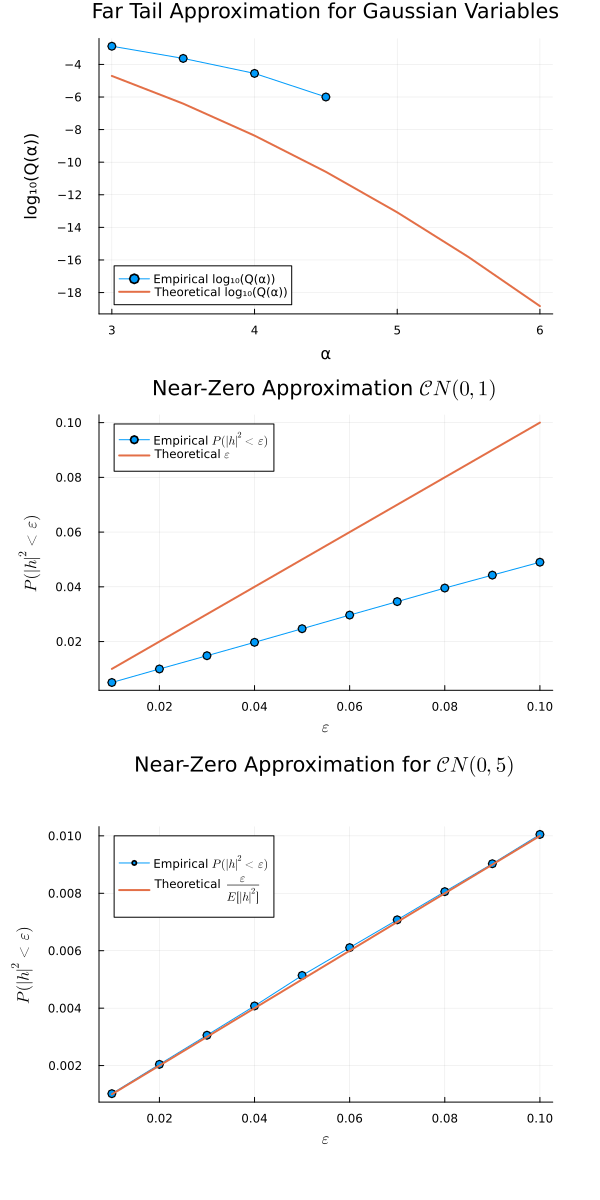

In [7]:
## Let's plot

plot(p1,p2,p3, layout= (3,1), size = (600,1200))

### **Key Observations**

1. **Far Tail for Gaussian Variables**:
   - $Q(\alpha)$ is well-approximated by $e^{-\alpha^2 / 2z}$, with $z \approx \sigma^2$.

2. **Near-Zero Behavior for $\mathbb{C}\mathcal{N}(0, 1)$**:
   - Empirical results closely match $P(\|h\|^2 < \epsilon) \approx \epsilon$.

3. **Near-Zero Behavior for $\mathbb{C}\mathcal{N}(0, 5)$**:
   - The empirical results match the approximation $P(\|h\|^2 < \epsilon) \approx \frac{\epsilon}{5}$, demonstrating the scaling factor introduced by the variance.